<h1> Projeto </h1>
<b>
<br>

<h1> Doutorado em Gestão e Organização do Conhecimento </h1>
<br>

<b> Discipline: Representação Distribuídas de Texto e Modelagem de Tópicos </b>
<br>
<b> Course: Data Mining and Modeling </b>
<br>
<b> Professor: Renato Rocha Souza </b>
<br>
<b> Professor: Mauricio Barcellos Almeida </b>
<br>
<b> Aluna: Amanda Damasceno de Souza </b>
<br>
<i> Topic: Modelling and Clustering documents </i>

<i> A motivação deste projeto é testar a similiaridade entre textos provenientes de fontes de informação da saúde sobre diagnóstico de <b>Vírus Zika<b/>.

<i> As fontes comparadas serão:  World Health Organization (OMS), Centers for Disease Control and Prevention (CDC) e uma fonte colaborativa a Wikipedia. </i>

Dataset utlizados <a href='https://en.wikipedia.org/wiki/Zika_virus'> Wikipedia </a>.
<a href='http://www.who.int/mediacentre/factsheets/zika/en/'> WHO </a>.
<a href='https://www.cdc.gov/zika/hc-providers/preparing-for-zika/clinicalevaluationdisease.html'> CDC </a>.

<b>Referências</b>
<br>
<a href='https://paulovasconcellos.com.br/como-criar-seu-primeiro-projeto-de-data-science-parte-2-de-2-cb9a2fe05eff'> Como criar seu primeiro projeto data science </a> 
<br>
<a href='https://paulovasconcellos.com.br/como-baixar-anaconda-31fd49c19bd8'> como baixar Anaconda </a>
<br>
<a href='https://www.oreilly.com/learning/how-do-i-compare-document-similarity-using-python'> How compare document similarity using python'</a>

In [1]:
outputs = "c:outputs"

In [2]:
import re
import os
import codecs
import string
import numpy as np
import pandas as pd
import gensim

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import feature_extraction
import mpld3

import pyLDAvis
import pyLDAvis.gensim
from IPython.display import Image

%matplotlib inline
#%matplotlib notebook

C:\Users\Amanda\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import gensim

In [4]:
import matplotlib.pyplot as plt

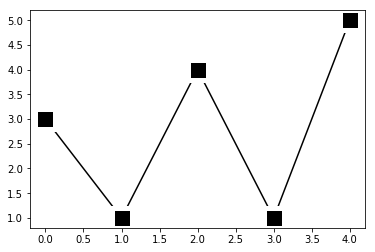

In [5]:
plt.plot([3,1,4,1,5], 'ks-', mec='w', mew=5, ms=20)

In [6]:
plt.show()

<h1> Como encontrar similaridades entre documento?</h1>
<br>
<i> utilizando a biblioteca gensim <i>

In [7]:
import gensim
print(dir(gensim))

['NullHandler', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'corpora', 'interfaces', 'logger', 'logging', 'matutils', 'models', 'parsing', 'scripts', 'similarities', 'summarization', 'topic_coherence', 'utils']


<h1>Criando os documentos</h1>
<br>

In [8]:
raw_documents = ["Infection with Zika virus may be suspected based on symptoms and recent history of travel (e.g. residence in or travel to an area with active Zika virus transmission). A diagnosis of Zika virus infection can only be confirmed through laboratory tests on blood or other body fluids, such as urine, saliva or semen.",
                "Based on the typical clinical features, the differential diagnosis for Zika virus infection is broad. In addition to dengue, other considerations include leptospirosis, malaria, rickettsia, group A streptococcus, rubella, measles, and parvovirus, enterovirus, adenovirus, and alphavirus infections.",
                "Preliminary diagnosis is based on the patient’s clinical features, places and dates of travel, and activities. Laboratory diagnosis is generally accomplished by testing whole blood, serum, or plasma to detect virus, viral nucleic acid, or virus-specific immunoglobulin M and neutralizing antibodies.",
                "Diagnosis is by testing the blood, urine, or saliva for the presence of Zika virus RNA when the person is sick."]

print("Number of documents:",len(raw_documents))

Number of documents: 4


<i> Utilizando NLTK to tokenize </i>
<br>
<i> Os documentos serão listados como tokens </i>


In [9]:
from nltk.tokenize import word_tokenize
gen_docs = [[w.lower() for w in word_tokenize(text)] 
            for text in raw_documents]
print(gen_docs)

[['infection', 'with', 'zika', 'virus', 'may', 'be', 'suspected', 'based', 'on', 'symptoms', 'and', 'recent', 'history', 'of', 'travel', '(', 'e.g', '.', 'residence', 'in', 'or', 'travel', 'to', 'an', 'area', 'with', 'active', 'zika', 'virus', 'transmission', ')', '.', 'a', 'diagnosis', 'of', 'zika', 'virus', 'infection', 'can', 'only', 'be', 'confirmed', 'through', 'laboratory', 'tests', 'on', 'blood', 'or', 'other', 'body', 'fluids', ',', 'such', 'as', 'urine', ',', 'saliva', 'or', 'semen', '.'], ['based', 'on', 'the', 'typical', 'clinical', 'features', ',', 'the', 'differential', 'diagnosis', 'for', 'zika', 'virus', 'infection', 'is', 'broad', '.', 'in', 'addition', 'to', 'dengue', ',', 'other', 'considerations', 'include', 'leptospirosis', ',', 'malaria', ',', 'rickettsia', ',', 'group', 'a', 'streptococcus', ',', 'rubella', ',', 'measles', ',', 'and', 'parvovirus', ',', 'enterovirus', ',', 'adenovirus', ',', 'and', 'alphavirus', 'infections', '.'], ['preliminary', 'diagnosis', 'is

In [10]:
>>> import nltk
>>> nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

<i>Criando o dicionário que irá indicar um número para cada palavra<i>


In [11]:
dictionary = gensim.corpora.Dictionary(gen_docs)
print(dictionary[4])
print(dictionary.token2id['virus'])
print("Number of words in dictionary:",len(dictionary))
for i in range(len(dictionary)):
    print(i, dictionary[i])

may
3
Number of words in dictionary: 97
0 infection
1 with
2 zika
3 virus
4 may
5 be
6 suspected
7 based
8 on
9 symptoms
10 and
11 recent
12 history
13 of
14 travel
15 (
16 e.g
17 .
18 residence
19 in
20 or
21 to
22 an
23 area
24 active
25 transmission
26 )
27 a
28 diagnosis
29 can
30 only
31 confirmed
32 through
33 laboratory
34 tests
35 blood
36 other
37 body
38 fluids
39 ,
40 such
41 as
42 urine
43 saliva
44 semen
45 the
46 typical
47 clinical
48 features
49 differential
50 for
51 is
52 broad
53 addition
54 dengue
55 considerations
56 include
57 leptospirosis
58 malaria
59 rickettsia
60 group
61 streptococcus
62 rubella
63 measles
64 parvovirus
65 enterovirus
66 adenovirus
67 alphavirus
68 infections
69 preliminary
70 patient
71 ’
72 s
73 places
74 dates
75 activities
76 generally
77 accomplished
78 by
79 testing
80 whole
81 serum
82 plasma
83 detect
84 viral
85 nucleic
86 acid
87 virus-specific
88 immunoglobulin
89 m
90 neutralizing
91 antibodies
92 presence
93 rna
94 when
95 perso

<i>Agora criaremos um corpus. Um corpus é uma lista de bag-of-words. </i>
<br>
<i>Uma representação de bag-of-words para um documento apenas lista o número de vezes que cada palavra ocorre no documento. </i>

In [12]:
corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]
print(corpus)

[[(0, 2), (1, 2), (2, 3), (3, 3), (4, 1), (5, 2), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 2), (15, 1), (16, 1), (17, 3), (18, 1), (19, 1), (20, 3), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)], [(0, 1), (2, 1), (3, 1), (7, 1), (8, 1), (10, 2), (17, 2), (19, 1), (21, 1), (27, 1), (28, 1), (36, 1), (39, 11), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1)], [(3, 1), (7, 1), (8, 1), (10, 3), (13, 1), (14, 1), (17, 2), (20, 2), (21, 1), (28, 2), (33, 1), (35, 1), (39, 6), (45, 1), (47, 1), (48, 1), (51, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82

<i>Agora, criamos um modelo tf-idf do corpus.<i>
<br>
<i>Observe que num_nnz é o número de tokens.</i>

In [13]:
tf_idf = gensim.models.TfidfModel(corpus)
print(tf_idf)
s = 0
for i in corpus:
    s += len(i)
print(s)

TfidfModel(num_docs=4, num_nnz=142)
142


<i>Agora vamos criar um objeto de medida de similaridade no espaço tf-idf.</i>
<br>
<i> O tf-idf significa freqüência do documento freqüência-inversa do termo. Freqüência é a quantidade de vezes que o termo aparece no texto.</i>

In [14]:
sims = gensim.similarities.Similarity('c:outputs',tf_idf[corpus],num_features=len(dictionary))

print(sims)

print(type(sims))

Similarity index with 4 documents in 0 shards (stored under c:outputs)
<class 'gensim.similarities.docsim.Similarity'>


<i> Agora o passo seguinte cria um documento de consulta e converte em tf-idf.</i>

In [15]:
query_doc = [w.lower() for w in word_tokenize("Diagnosis is by testing the blood, urine, or saliva for the presence of Zika virus RNA when the person is sick.")]
print(query_doc)
query_doc_bow = dictionary.doc2bow(query_doc)
print(query_doc_bow)
query_doc_tf_idf = tf_idf[query_doc_bow]
print(query_doc_tf_idf)

['diagnosis', 'is', 'by', 'testing', 'the', 'blood', ',', 'urine', ',', 'or', 'saliva', 'for', 'the', 'presence', 'of', 'zika', 'virus', 'rna', 'when', 'the', 'person', 'is', 'sick', '.']
[(2, 1), (3, 1), (13, 1), (17, 1), (20, 1), (28, 1), (35, 1), (39, 2), (42, 1), (43, 1), (45, 3), (50, 1), (51, 2), (78, 1), (79, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1)]
[(2, 0.07853525645576327), (13, 0.07853525645576327), (20, 0.07853525645576327), (35, 0.07853525645576327), (42, 0.18922448355202529), (43, 0.18922448355202529), (45, 0.2356057693672898), (50, 0.18922448355202529), (51, 0.15707051291152654), (78, 0.18922448355202529), (79, 0.18922448355202529), (92, 0.37844896710405057), (93, 0.37844896710405057), (94, 0.37844896710405057), (95, 0.37844896710405057), (96, 0.37844896710405057)]


In [16]:
query_doc = [w.lower() for w in word_tokenize("Infection with Zika virus may be suspected based on symptoms and recent history of travel (e.g. residence in or travel to an area with active Zika virus transmission). A diagnosis of Zika virus infection can only be confirmed through laboratory tests on blood or other body fluids, such as urine, saliva or semen.")]
print(query_doc)
query_doc_bow = dictionary.doc2bow(query_doc)
print(query_doc_bow)
query_doc_tf_idf = tf_idf[query_doc_bow]
print(query_doc_tf_idf)

['infection', 'with', 'zika', 'virus', 'may', 'be', 'suspected', 'based', 'on', 'symptoms', 'and', 'recent', 'history', 'of', 'travel', '(', 'e.g', '.', 'residence', 'in', 'or', 'travel', 'to', 'an', 'area', 'with', 'active', 'zika', 'virus', 'transmission', ')', '.', 'a', 'diagnosis', 'of', 'zika', 'virus', 'infection', 'can', 'only', 'be', 'confirmed', 'through', 'laboratory', 'tests', 'on', 'blood', 'or', 'other', 'body', 'fluids', ',', 'such', 'as', 'urine', ',', 'saliva', 'or', 'semen', '.']
[(0, 2), (1, 2), (2, 3), (3, 3), (4, 1), (5, 2), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 2), (15, 1), (16, 1), (17, 3), (18, 1), (19, 1), (20, 3), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)]
[(0, 0.16715042926354995), (1, 0.3343008585270999), (2, 0.10406054424739353), (4, 0.16715042926354995)

In [17]:
query_doc = [w.lower() for w in word_tokenize("Based on the typical clinical features, the differential diagnosis for Zika virus infection is broad. In addition to dengue, other considerations include leptospirosis, malaria, rickettsia, group A streptococcus, rubella, measles, and parvovirus, enterovirus, adenovirus, and alphavirus infections.")]
print(query_doc)
query_doc_bow = dictionary.doc2bow(query_doc)
print(query_doc_bow)
query_doc_tf_idf = tf_idf[query_doc_bow]
print(query_doc_tf_idf)

['based', 'on', 'the', 'typical', 'clinical', 'features', ',', 'the', 'differential', 'diagnosis', 'for', 'zika', 'virus', 'infection', 'is', 'broad', '.', 'in', 'addition', 'to', 'dengue', ',', 'other', 'considerations', 'include', 'leptospirosis', ',', 'malaria', ',', 'rickettsia', ',', 'group', 'a', 'streptococcus', ',', 'rubella', ',', 'measles', ',', 'and', 'parvovirus', ',', 'enterovirus', ',', 'adenovirus', ',', 'and', 'alphavirus', 'infections', '.']
[(0, 1), (2, 1), (3, 1), (7, 1), (8, 1), (10, 2), (17, 2), (19, 1), (21, 1), (27, 1), (28, 1), (36, 1), (39, 11), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1)]
[(0, 0.10831285094654547), (2, 0.04495389479661637), (7, 0.04495389479661637), (8, 0.04495389479661637), (10, 0.08990778959323274), (19, 0.10831285094654547), (21, 0.04495389479661637), (27, 0.10831285094654

<i>Finalmente o ultimo codigo serve para mostrar a semelhança entre os textos, quais são mais semelhantes. </i>

In [18]:
sims[query_doc_tf_idf]

array([ 0.05929513,  1.        ,  0.04736978,  0.05226963], dtype=float32)

<i>Nesta versao consegui solucionar o ultimo erro do codigo de output, sendo  apresnetados os resultados de similaridade entre os textos sobre diagnostico. Assim com as lições aprendidas durante o projeto, fiz uma lista de sites de ajudas, dicas e glossario </i>

<h1>Python- conhecendo os  erros e exceções</h1>
<br>

<h1>Sites de ajuda</h1>
<br>


Possiveis <i>erros/problemas</i> podem ocorrer como o <b>gensim</b> não rodar, assim será necessário baixar o arquivo que pode ser encontrado no site abaixo (clicar no link):

<a> Docker NLTK Download: <a href='https://mpld3.github.io/install.html'> </a>
<br>

<a> word2vec <a href='https://radimrehurek.com/gensim/models/word2vec.html'> </a>

<a> gensim <a href='https://radimrehurek.com/gensim/install.html'> </a>

<a> Erros prováveis <a href=' https://stackoverflow.com/questions/31143015/docker-nltk-download?noredirect=1&lq=1'> </a>

<a> Tutorial no Github <a href=' https://mpld3.github.io/install.html'> </a>

<a> Tutorial sobre erros <a href='https://anenadic.github.io/2014-11-10-manchester/novice/python/07-errors.html'> </a>

<b>Outros sites</b>

Sites https://mpld3.github.io/install.html Docker NLTK Download

https://stackoverflow.com/questions/31143015/docker-nltk-download?noredirect=1&lq=1


<b>Erros que aconteceram durante o projeto e foram solucionados:</b>

python: SyntaxError: EOL while scanning string literal -

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<ipython-input-8-7c070fd98884> in <module>()
----> 1 dictionary = gensim.corpora.Dictionary(gen_docs)
      2 print(dictionary[5])
      3 print(dictionary.token2id['road'])
      4 print("Number of words in dictionary:",len(dictionary))
      5 for i in range(len(dictionary)):

NameError: name 'gensim' is not defined

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<ipython-input-2-b4d2068345c2> in <module>()
      1 from nltk.tokenize import word_tokenize
      2 gen_docs = [[w.lower() for w in word_tokenize(text)] 
----> 3             for text in raw_documents]
      4 print(gen_docs)

NameError: name 'raw_documents' is not defined






---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
<ipython-input-3-0bc85fb32b73> in <module>()
     16 import matplotlib as mpl
     17 from sklearn import feature_extraction
---> 18 import mpld3
     19 
     20 import pyLDAvis

ModuleNotFoundError: No module named 'mpld3'



<b>Caso ocorra o erro abaixo: LookupError: </b>


Resource 'tokenizers/punkt/english.pickle' not found. Please use the NLTK Downloader to obtain the resource: >>> nltk.download() Searched in:
- 'C:\\Users\\Amanda/nltk_data'
- 'C:\\nltk_data'
- 'D:\\nltk_data'
- 'E:\\nltk_data'
- 'C:\\Users\\Amanda\\Anaconda3\\nltk_data'
- 'C:\\Users\\Amanda\\Anaconda3\\lib\\nltk_data'
- 'C:\\Users\\Amanda\\AppData\\Roaming\\nltk_data'
- ''

sera necessario rodar o codigo:
>>> import nltk
>>> nltk.download()


<h1>Dicas</h1>
<br>

Utilize o <i>Markdowns</i> para esclarecer como o trabalho foi desenvolvido. O <i>Markdowns</i> aceita HTML, assim utilize esta linguagem para melhorar apresentação do texto.


Ao rodar os codigos problemas aparecem em relação ao gensim. Sera necessario entrar no navegador anaconda - environments - root - open terminal - acessar o ambiente da linha de comando e configurar os paths do Anaconda para instalar os pacotes necessarios. Na tela de comando digitar :<b> conda install gensim ou pip install gensim </b>

Apos rodar os codigos novamente, pode aparecer o seguinte erro:

<i>C:\Users\Amanda\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")</i>

Assim sera necessario rodar o codigo abaixo na celula: 

<i>import warnings warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import gensim</i>


<h1>Glossário</h1>
<br>

Segue um site de <i>glossário</i> com terminologias utilizadas em programação

https://anenadic.github.io/2014-11-10-manchester/gloss.html#traceback

<h1>Considerações finais</h1>
<br>





A programação em Python é  um recurso incrível para criar um projeto de <i>Data Science</i>. Entretanto é  necessario conhecer os códigos e ter todos os componentes necessarios instalados no computador para o projeto funcionar corretamente. 
<br> 

Neste projeto o objetivo era testar a similaridade de textos sobre diagnostico de virus zika e com isso buscar conhecer as proximidades ou distanciamento entre fonte de informações em saude consideradas oficiais das não oficiais.
<br>

Na sessão de <b>Dicas</b> do projeto reportei alguns problemas que foram enfrentados em relação a recursos necessários para os codigos rodarem corretamente, assim fiz a indicação de onde encontrar soluções. No meu projeto especificamente, mesmo fazendo a instalação dos componentes muitos problemas persistiram.

O projeto foi o inicio de uma caminhada para aprender linguagem de programação e as diversas possibilidades de trabalhar a informação uitlizando os recursos de modelagem de topicos e <i>Data Science</i>. 

Alguns códigos deram muitos erros como o: matplotlib e mpld3. Tive que instalar varias vezes e testar com codigos diferentes do projeto, por isso tem um grafico no inicio deste projeto. 

Na ultima parte do projeto ocorreu um erro no <b> '/usr/workdir/ </b> o qual não encontrei solução na internet. Infelizmente este era o resultado de todo projeto.

A intenção é continuar este projeto e testar em prontuarios eletronicos nos campos abertos de anamnese de pacientes diagnosticados com virus zika.

<b> Amanda</b>